In [2]:
import pandas as pd
import numpy as np
import keras 
import matplotlib.pyplot as plt

%matplotlib inline 

In [3]:
##Read in the data
df = pd.read_csv('Churn_Modelling.csv')
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
##Data Preprocessing
# Create Training and Test sets

from sklearn.model_selection import train_test_split

y = df['Exited']
X = df.drop('Exited',axis=1)

X = pd.get_dummies(X,drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
##Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Create the Artificial Neural Network
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Create the layers
classifier = Sequential()

# Adding the first hidden layer
classifier.add(Dense(units=6,
                     kernel_initializer='uniform',
                     activation='relu',
                     input_dim=11))

# Adding the second hidden layer
classifier.add(Dense(units=6,
                     kernel_initializer='uniform',
                     activation='relu'))  # don't need to specify the input_dim for subsequent layers

# Add the final output layer
classifier.add(Dense(units=1,   # we have a binary outcome Yes/No
                     kernel_initializer = 'uniform',
                     activation = 'sigmoid'))  # for more than 2 categories use 'softmax'

In [ ]:
# Compile the ANN
classifier.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
# Fit the ANN to the data
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
800/800 [==============================] - 5s 3ms/step - loss: 0.5052 - accuracy: 0.7968
Epoch 2/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4305 - accuracy: 0.7971
Epoch 3/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4257 - accuracy: 0.7971
Epoch 4/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4220 - accuracy: 0.7971
Epoch 5/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4189 - accuracy: 0.8189
Epoch 6/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4163 - accuracy: 0.8284
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4145 - accuracy: 0.8305
Epoch 8/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4127 - accuracy: 0.8303
Epoch 9/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4113 - accuracy: 0.8324
Epoch 10/100
800/800 [==============================] - 1s 2ms/step - loss: 0.4099 - accura

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5

print ("Accuracy on test set : ", accuracy_score(y_test, y_pred))

print ("\nConfusion Matrix : \n", confusion_matrix(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
Accuracy on test set :  0.8265

Confusion Matrix : 
 [[1520   66]
 [ 281  133]]


Text(50.722222222222214, 0.5, 'Truth')

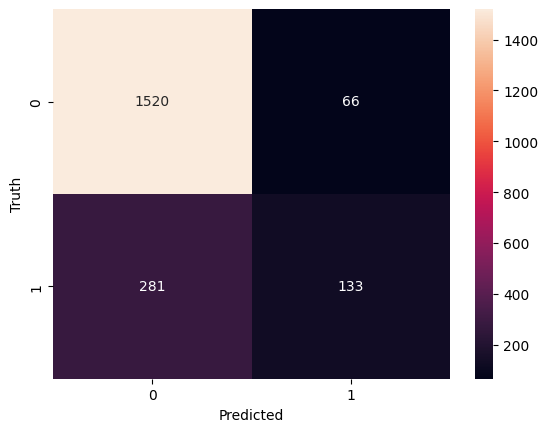

In [ ]:
import seaborn as sn

cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Truth')